<a href="https://colab.research.google.com/github/GustaveRw/California-Housing-Price-Prediction/blob/master/California_Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### California House Price Prediction Project

1. Loading the data

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_excel("/content/1553768847_housing.xlsx")

# Print the first few rows of the data
print(data.head())

# Extract input (X) and output (Y) data
X = data.drop("median_house_value", axis=1)
Y = data["median_house_value"]


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  median_house_value  
0         322         126         8.3252        NEAR BAY              452600  
1        2401        1138         8.3014        NEAR BAY              358500  
2         496         177         7.2574        NEAR BAY              352100  
3         558         219         5.6431        NEAR BAY              341300  
4         565         259         3.8462        NEAR BAY              342200  


2. Handle missing values

In [4]:
# Fill missing values with the mean of the respective column
X.fillna(X.mean(), inplace=True)


<ipython-input-4-ca6c6115a4ce>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X.fillna(X.mean(), inplace=True)


3. Encode categorical data.

In [5]:
# Convert categorical column 'ocean_proximity' to numerical data using one-hot encoding
X_encoded = pd.get_dummies(X, columns=["ocean_proximity"])


4. Split the dataset

In [6]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training dataset and 20% test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=42)


5. Standardize data

In [7]:
from sklearn.preprocessing import StandardScaler

# Standardize training and test datasets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


6. Perform Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Perform Linear Regression on training data
lr = LinearRegression()
lr.fit(X_train_scaled, Y_train)

# Predict output for the test dataset using the fitted model
Y_pred = lr.predict(X_test_scaled)

# Print root mean squared error (RMSE) from Linear Regression
rmse_lr = mean_squared_error(Y_test, Y_pred, squared=False)
print("Linear Regression RMSE:", rmse_lr)


Linear Regression RMSE: 70031.41991955665


7. Perform Decision Tree Regression

In [9]:
from sklearn.tree import DecisionTreeRegressor

# Perform Decision Tree Regression on training data
dt = DecisionTreeRegressor()
dt.fit(X_train_scaled, Y_train)

# Predict output for the test dataset using the fitted model
Y_pred_dt = dt.predict(X_test_scaled)

# Print root mean squared error from Decision Tree Regression
rmse_dt = mean_squared_error(Y_test, Y_pred_dt, squared=False)
print("Decision Tree Regression RMSE:", rmse_dt)


Decision Tree Regression RMSE: 70213.3374692669


8. Perform Random Forest Regression

In [10]:
from sklearn.ensemble import RandomForestRegressor

# Perform Random Forest Regression on training data
rf = RandomForestRegressor()
rf.fit(X_train_scaled, Y_train)

# Predict output for the test dataset using the fitted model
Y_pred_rf = rf.predict(X_test_scaled)

# Print RMSE from Random Forest Regression
rmse_rf = mean_squared_error(Y_test, Y_pred_rf, squared=False)
print("Random Forest Regression RMSE:", rmse_rf)


Random Forest Regression RMSE: 48916.2831833614


9. Bonus exercise: Perform Linear Regression with one independent variable (median_income)

In [11]:
# Extract just the median_income column from the independent variables (from X_train and X_test)
X_train_income = X_train_scaled[:, X_encoded.columns.get_loc("median_income")]
X_test_income = X_test_scaled[:, X_encoded.columns.get_loc("median_income")]

# Perform Linear Regression to predict housing values based on median_income
lr_income = LinearRegression()
lr_income.fit(X_train_income.reshape(-1, 1), Y_train)

# Predict output for the test dataset using the fitted model
Y_pred_income = lr_income.predict(X_test_income.reshape(-1, 1))

# Print RMSE for Linear Regression with median_income
rmse_lr_income = mean_squared_error(Y_test, Y_pred_income, squared=False)
print("Linear Regression with median_income RMSE:", rmse_lr_income)



Linear Regression with median_income RMSE: 84209.01241414454


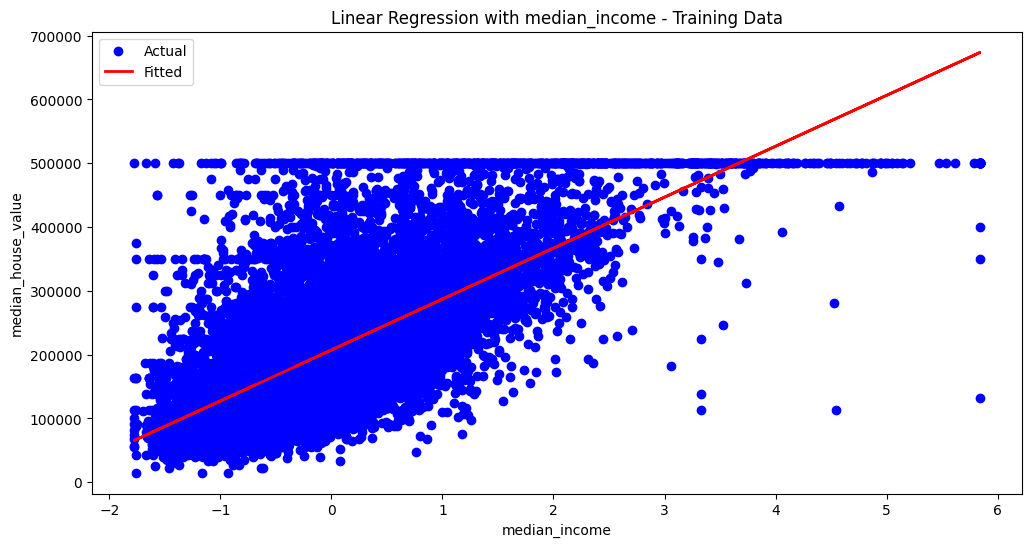

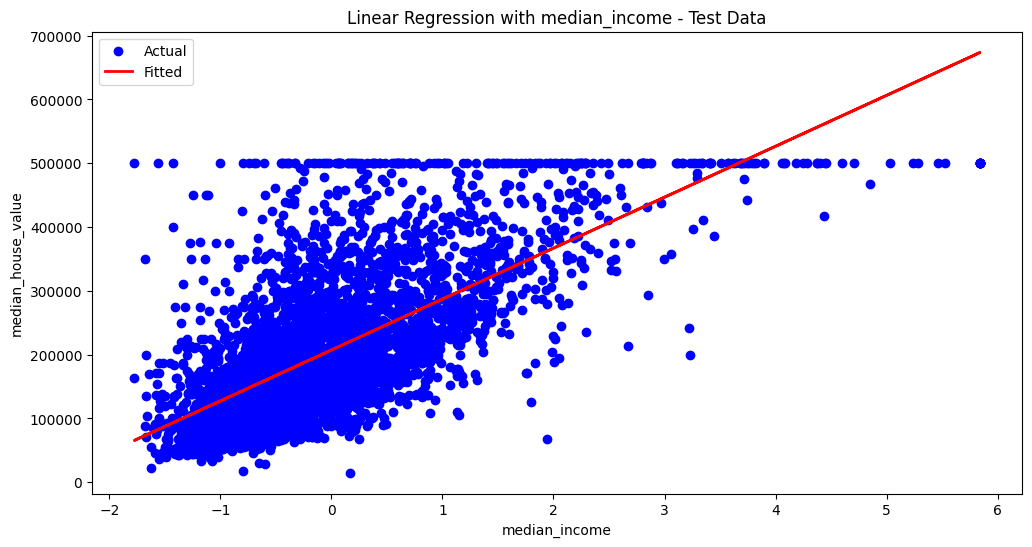

In [12]:
import matplotlib.pyplot as plt

# Plot the fitted model for training data
plt.figure(figsize=(12, 6))
plt.scatter(X_train_income, Y_train, color='blue', label='Actual')
plt.plot(X_train_income, lr_income.predict(X_train_income.reshape(-1, 1)), color='red', linewidth=2, label='Fitted')
plt.title('Linear Regression with median_income - Training Data')
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.legend()
plt.show()

# Plot the fitted model for test data
plt.figure(figsize=(12, 6))
plt.scatter(X_test_income, Y_test, color='blue', label='Actual')
plt.plot(X_test_income, Y_pred_income, color='red', linewidth=2, label='Fitted')
plt.title('Linear Regression with median_income - Test Data')
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.legend()
plt.show()
